---


# **Data Prepocessing and Regression**

---
**Dataset Path:** "Data/insurance.csv"
---

We will deal with the insurance dataset. This dataset contains data on individual medical insurance costs based on several demographic and personal health factors.

**Features:**


* Age: Age of the individual
* Sex: Gender of the individual
* BMI: Body Mass Index, a measure of body fat based on height and weight
* Children: Number of children/dependents
* Smoker: Whether the individual smokes or not
* Region: Geographical region in the US
* Charges: Medical expenses (target variable for regression)

# **Necessary Imports**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

# **PART- 1: Data Preprocessing (50 Pts)**

---

## 1.1. Explaratory Data Analysis (10 Pts)

* Check for missing values
* Visualize the features with any relevant plots to understand the distribution of data
* Visualize the target variable with respect to the features
* Visualize the correlation between the features using a heatmap
* Comment on any findings

In [2]:
#initialize the data frame
df = pd.read_csv("Data/insurance.csv") 
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Check for missing values

In [3]:
#Check for missing values
print(df.isnull().sum().sum())

0


In [4]:
#Check for missing values for each column
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

It has been determined that there are no missing values in this data frame.

### Visualize the features with any relevant plots to understand the distribution of data

#### Visualize the 'age'

In [5]:
#Calculate the min and max values for the bin range.
print(df['age'].min())
print(df['age'].max())

18
64


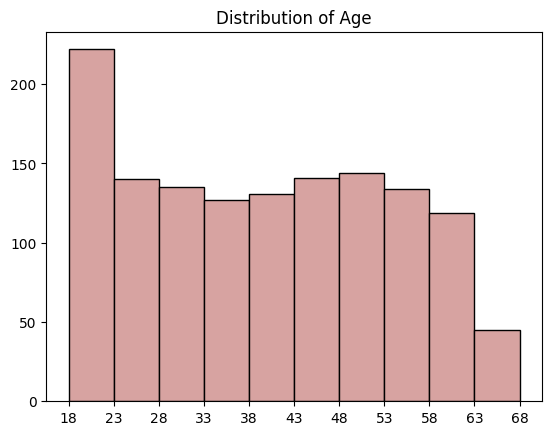

In [6]:
# Since age is a numerical variable, it was visualized using a histogram.
plt.hist(df['age'], bins=np.arange(18, 69, 5), color='#D7A3A1', edgecolor='black') 
plt.xticks(np.arange(18, 69, 5)) 
plt.title('Distribution of Age')
plt.show()

The age distribution is somewhat higher in the **18-23** age range, while it is lower in the **63-68** age range. Outside of these ranges, the distribution is generally uniform.

#### Visualize the 'sex'

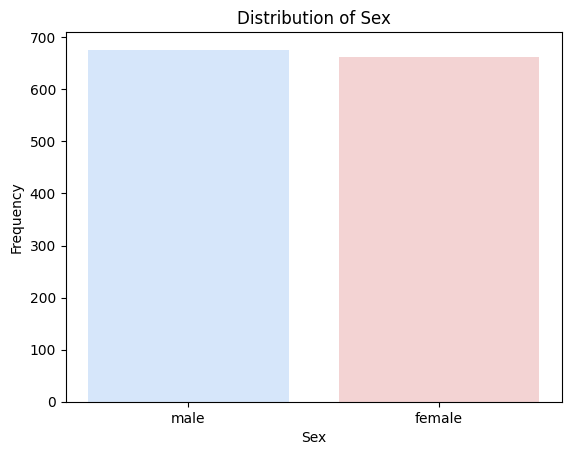

In [7]:
#Since gender is a categorical variable, a bar chart was used for visualization.
# Count the occurrences of each gender
sex_counts = df['sex'].value_counts() 

# Create a bar chart to visualize the distribution of gender
plt.bar(sex_counts.index, sex_counts, color=['#D6E6FA', '#F3D3D3'])

plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

When looking at the sex distribution in the chart, it can be observed that the male-to-female ratio is very close to each other.

#### Visualize the 'bmi'

In [8]:
#Calculate the min and max values for the bin range.
print(df['bmi'].min())
print(df['bmi'].max())

15.96
53.13


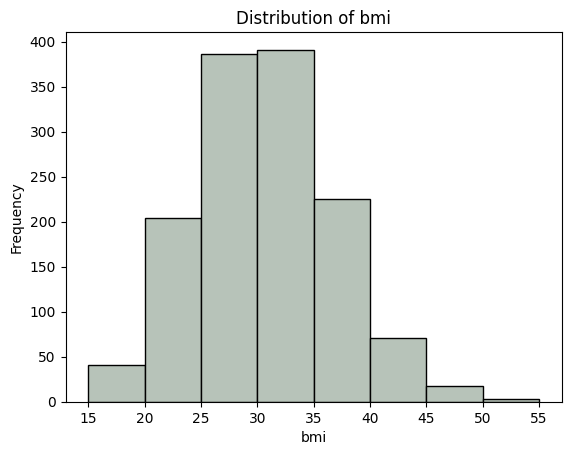

In [9]:
# Since bmi is a numerical variable, it was visualized using a histogram.
plt.hist(df['bmi'], bins=np.arange(15, 56, 5), color='#B7C3B9', edgecolor='black') 
plt.xticks(np.arange(15, 56, 5)) 
plt.title('Distribution of bmi')
plt.xlabel('bmi')
plt.ylabel('Frequency')
plt.show()

When examining the histogram, the **bmi** distribution is right-skewed and unimodal. The data is generally concentrated in the **25-35** range.

#### Visualize the 'children'

In [10]:
print(df['children'].min())
print(df['children'].max())

0
5


Although the number of children is a numerical variable, the range of values it can take is small, so all the values are visualized in such a way that each category shows a single value.

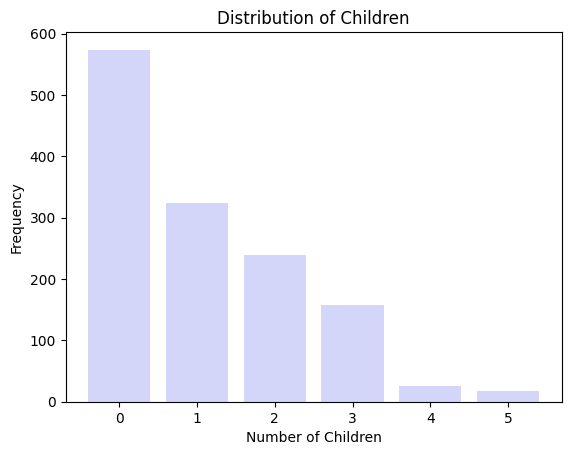

In [11]:
# Count the occurrences of each children number
children_counts = df['children'].value_counts()

# Create a bar chart to visualize the distribution of children
plt.bar(children_counts.index, children_counts, color='#D4D6F9')

plt.title('Distribution of Children')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')

plt.show()

Upon examining the bar chart, it is observed that the most common number of children is 0, while the least common is 5. The distribution of children follows a decreasing trend.

#### Visualize the 'smoker'

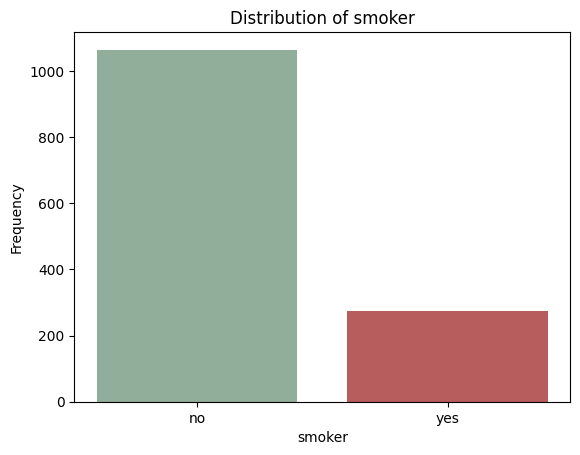

In [12]:
#Since smoker is a categorical variable, a bar chart was used for visualization.
# Count the occurrences of each smoker
smoker_counts = df['smoker'].value_counts() 

# Create a bar chart to visualize the distribution of gender
plt.bar(smoker_counts.index, smoker_counts, color=['#90AE99', '#B75D5D'])

plt.title('Distribution of smoker')
plt.xlabel('smoker')
plt.ylabel('Frequency')
plt.show()

Upon examining the graph, it is observed that the number of non-smokers is more than three times higher than the number of smokers.

#### Visualize the 'region'

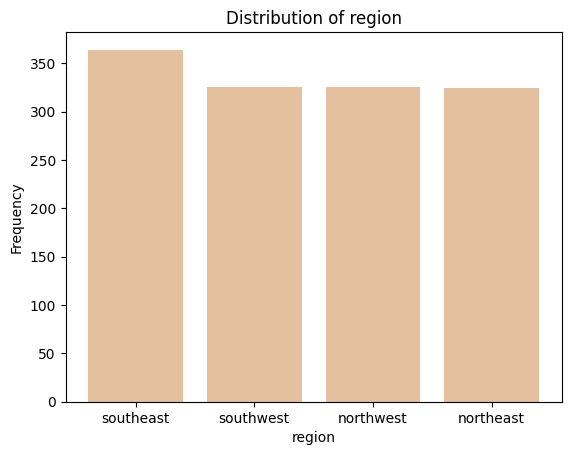

In [13]:
#Since region is a categorical variable, a bar chart was used for visualization.
# Count the occurrences of each region
region_counts = df['region'].value_counts() 

# Create a bar chart to visualize the distribution of region
plt.bar(region_counts.index, region_counts, color=['#E5C09F'])

plt.title('Distribution of region')
plt.xlabel('region')
plt.ylabel('Frequency')
plt.show()

As seen in the graph, southwest, northwest, and northeast have almost the same frequency, while southeast has slightly higher frequency than the others.

### Visualize the target variable with respect to the features

#### Visualize the target variable with respect to the 'age'

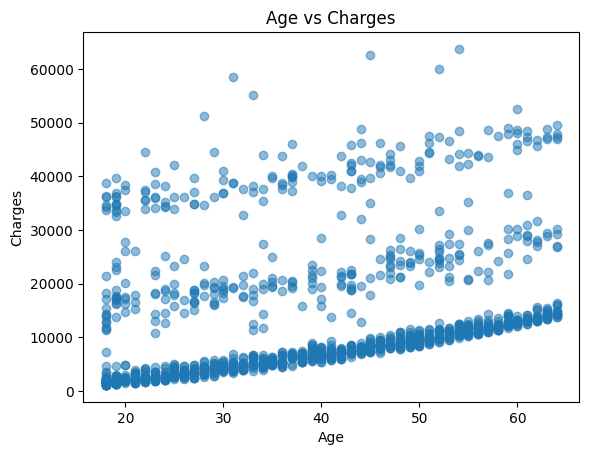

In [14]:
#target variable is 'charges'
# Scatter plot of 'age' vs 'charges' with transparency for better visualization
plt.scatter(df['age'], df['charges'], alpha=0.5)
# Adding a title to the scatter plot
plt.title('Age vs Charges')

# Labeling the x-axis as 'Age'
plt.xlabel('Age')

# Labeling the y-axis as 'Charges'
plt.ylabel('Charges')

# Displaying the plot
plt.show()

When the graph is analyzed, it has been determined that there is a positive correlation between age and the target variable.

#### Visualize the target variable with respect to the 'sex'

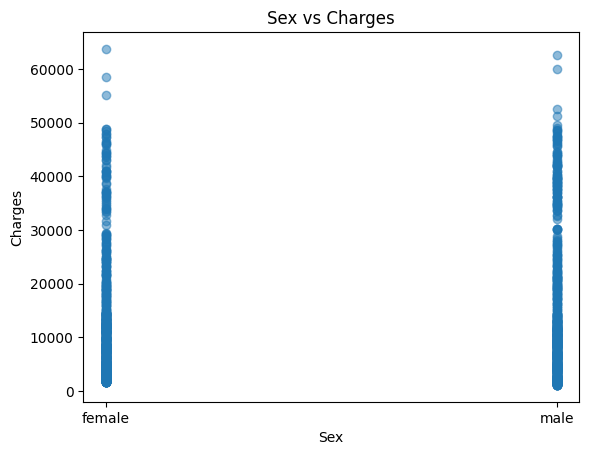

In [15]:
#target variable is 'charges'
# Scatter plot of 'sex' vs 'charges' with transparency for better visualization
plt.scatter(df['sex'], df['charges'], alpha=0.5)
# Adding a title to the scatter plot
plt.title('Sex vs Charges')

# Labeling the x-axis as 'Sex'
plt.xlabel('Sex')

# Labeling the y-axis as 'Charges'
plt.ylabel('Charges')

# Displaying the plot
plt.show()

When the graph is analyzed, it has been determined that the data for both genders is concentrated between **0 and 50,000**.

#### Visualize the target variable with respect to the 'bmi'

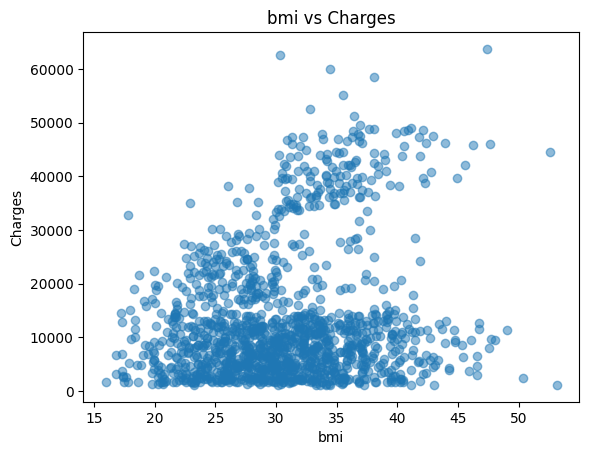

In [16]:
#target variable is 'charges'
# Scatter plot of 'bmi' vs 'charges' with transparency for better visualization
plt.scatter(df['bmi'], df['charges'], alpha=0.5)

# Adding a title to the scatter plot
plt.title('bmi vs Charges')

# Labeling the x-axis as 'bmi'
plt.xlabel('bmi')

# Labeling the y-axis as 'Charges'
plt.ylabel('Charges')

# Displaying the plot
plt.show()

As bmi increases, charges may also increase; however, this growth does not show a clear linear relationship.

#### Visualize the target variable with respect to the 'children'

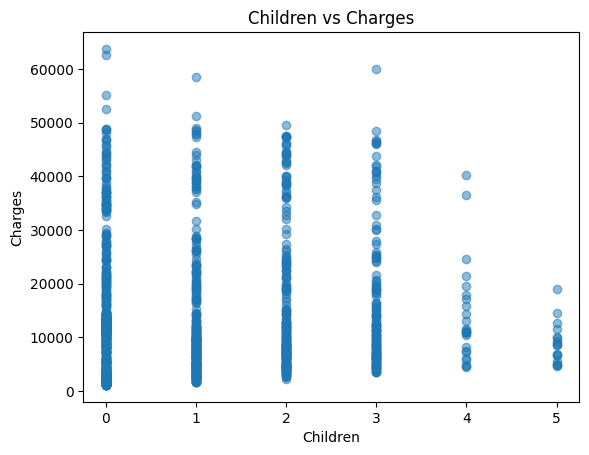

In [17]:
#target variable is 'charges'
# Scatter plot of 'children' vs 'charges' with transparency for better visualization
plt.scatter(df['children'], df['charges'], alpha=0.5)

# Adding a title to the scatter plot
plt.title('Children vs Charges')

# Labeling the x-axis as 'Children'
plt.xlabel('Children')

# Labeling the y-axis as 'Charges'
plt.ylabel('Charges')

# Displaying the plot
plt.show()

In the dataset, it is observed that data is more concentrated for up to 3 children, while 4 and 5 children are less common. From this graph, it can be concluded that the number of children does not have a direct strong impact on charges.

#### Visualize the target variable with respect to the 'smoker'

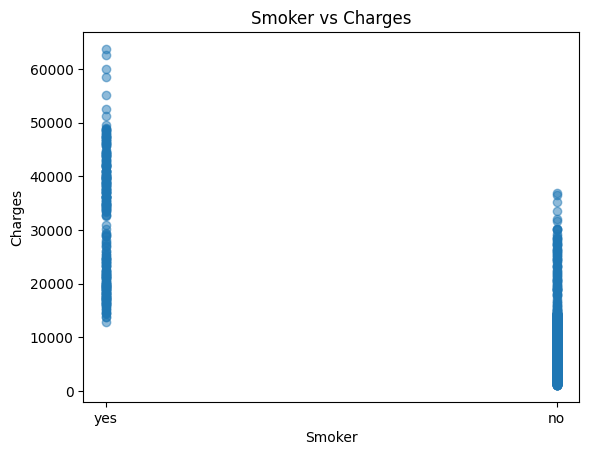

In [18]:
#target variable is 'charges'
# Scatter plot of 'smoker' vs 'charges' with transparency for better visualization
plt.scatter(df['smoker'], df['charges'], alpha=0.5)

# Adding a title to the scatter plot
plt.title('Smoker vs Charges')

# Labeling the x-axis as 'Smoker'
plt.xlabel('Smoker')

# Labeling the y-axis as 'Charges'
plt.ylabel('Charges')

# Displaying the plot
plt.show()

For smokers, charges generally reach higher values, while for non-smokers, they are mostly concentrated at lower values. Smoking appears to have a strong impact on charges.

#### Visualize the target variable with respect to the 'region'

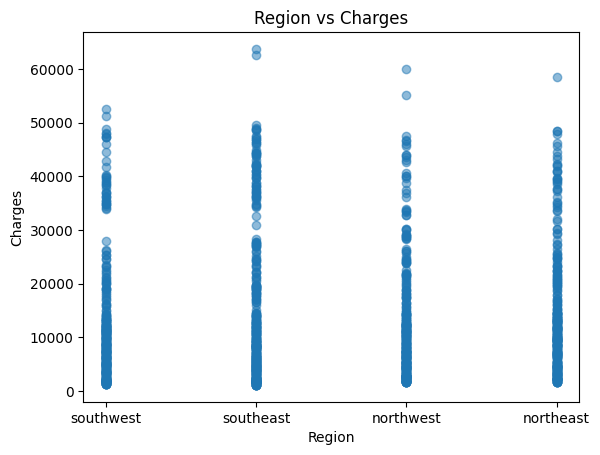

In [19]:
#target variable is 'charges'
# Scatter plot of 'region' vs 'charges' with transparency for better visualization
plt.scatter(df['region'], df['charges'], alpha=0.5)

# Adding a title to the scatter plot
plt.title('Region vs Charges')

# Labeling the x-axis as 'Region'
plt.xlabel('Region')

# Labeling the y-axis as 'Charges'
plt.ylabel('Charges')

# Displaying the plot
plt.show()

Charges generally have similar values across different regions. It can be concluded that the region does not have a direct strong impact on charges.

### Visualize the correlation between the features using a heatmap

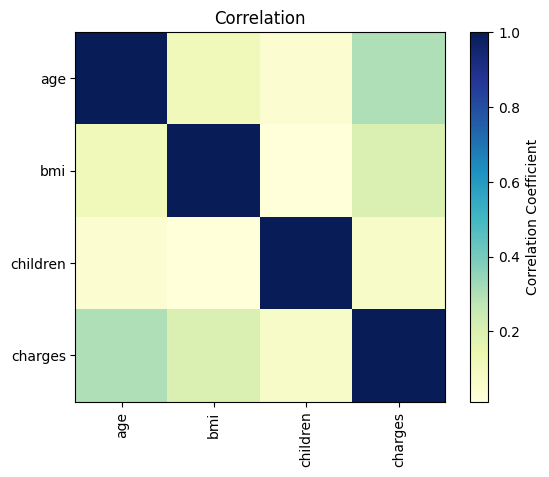

In [20]:
# select numerical variables
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# create heatmap
plt.imshow(correlation_matrix, cmap='YlGnBu')
plt.colorbar(label="Correlation Coefficient")

plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.title('Correlation')
plt.show()

All values along the diagonal are 1 because a variable is perfectly correlated with itself. There is a moderate positive correlation between age and charges, but there is no significant correlation between the other variables.

## 1.2. Outlier Detection (15 Pts)
* Choose an outlier detection method and apply it to the data.
* Explain your method and why you choose it.

In [21]:
# Select the numeric variables
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the 1st and 3rd quartiles to find the IQR
Q1 = df[numeric_columns].apply(lambda x: x.quantile(0.25))
Q3 = df[numeric_columns].apply(lambda x: x.quantile(0.75))
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR; # Lower bound: Values more than 1.5 IQR below Q1
upper_bound = Q3 + 1.5 * IQR; # Upper bound: Values more than 1.5 IQR above Q3

#Values that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers.
numeric_outliers = ((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound))

print(numeric_outliers.sum())  

age           0
bmi           9
children      0
charges     139
dtype: int64


In [22]:
# Apply the outlier detection method to the data 
df_without_outliers = df[~numeric_outliers.any(axis=1)] 
df_without_outliers

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


I chose the IQR method because it is quick and easy to apply. Since the dataset is not very large, the IQR method is suitable for this dataset. It can also be visualized using a boxplot.

## 1.3. Outlier Handling (15 Pts)
Try the following methods to handle outliers, creating checkpoints for each. Additionally, visualize the final data distribution after each method to identify any significant changes
1. Keep the dataset as is - take the original checkpoint for baseline comparison.
2. Outlier removal
3. Mean Imputation (Use Mode imputation for categorical variables)
4. Median Imputation (Use Mode imputation for categorical variables)

In [23]:
original_df = df.copy()

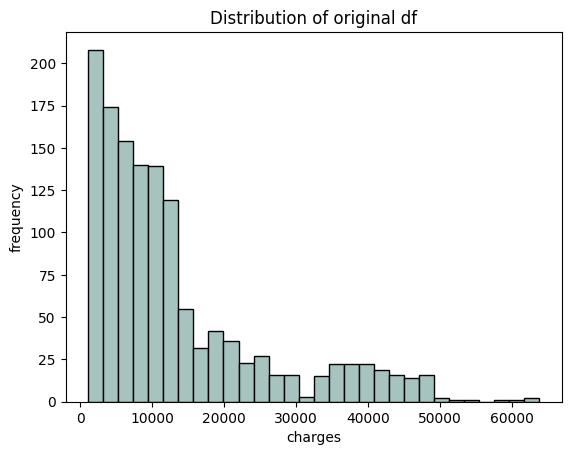

In [24]:
# Plotting a histogram of 'charges' from the original dataframe
plt.hist(original_df['charges'], bins=30, color='#A7C3C0', edgecolor='black') 

plt.title('Distribution of original df')
plt.xlabel('charges')
plt.ylabel('frequency')
plt.show()

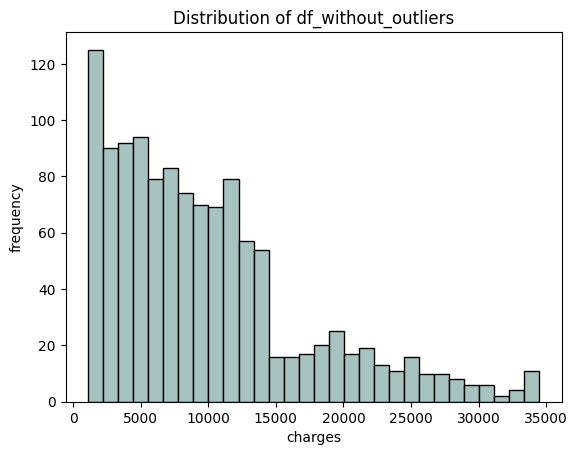

In [25]:
# Plotting a histogram of 'charges' from the df_without_outliers
plt.hist(df_without_outliers['charges'], bins=30, color='#A7C3C0', edgecolor='black') 

plt.title('Distribution of df_without_outliers')
plt.xlabel('charges')
plt.ylabel('frequency')
plt.show()

When the outliers were removed from the dataframe, the outliers in other features were also removed, which led to a decrease in the frequencies of the **charges** feature. Additionally, the outliers in **charges** (those **35,000 and above**) were also removed from the dataframe.

In [26]:
mean_age = df['age'].mean()
mean_age

np.float64(39.20702541106129)

In [27]:
mean_bmi = df['bmi'].mean()
mean_bmi

np.float64(30.66339686098655)

In [28]:
mean_children = df['children'].mean()
mean_children

np.float64(1.0949177877429)

In [29]:
mean_charges = df['charges'].mean()
mean_charges

np.float64(13270.422265141257)

In [30]:
df_mean_imputation = df.copy()

# Assign the calculated mean values to the outlier values.
df_mean_imputation['age'] = df_mean_imputation['age'].where(~numeric_outliers['age'], mean_age)
df_mean_imputation['bmi'] = df_mean_imputation['bmi'].where(~numeric_outliers['bmi'], mean_bmi)
df_mean_imputation['children'] = df_mean_imputation['children'].where(~numeric_outliers['children'], mean_children)
df_mean_imputation['charges'] = df_mean_imputation['charges'].where(~numeric_outliers['charges'], mean_charges)
df_mean_imputation

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


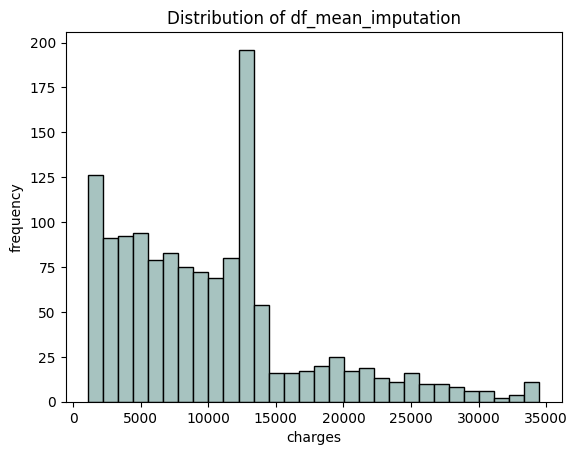

In [31]:
# Plotting a histogram of 'charges' from the df_mean_imputation
plt.hist(df_mean_imputation['charges'], bins=30, color='#A7C3C0', edgecolor='black') 

plt.title('Distribution of df_mean_imputation')
plt.xlabel('charges')
plt.ylabel('frequency')
plt.show()

As a result of replacing the outliers with the **mean**, the frequency of the **charges** feature at the mean value increased significantly.

In [32]:
median_age = df['age'].median()
median_age

np.float64(39.0)

In [33]:
median_bmi = df['bmi'].median()
median_bmi

np.float64(30.4)

In [34]:
median_children = df['children'].median()
median_children

np.float64(1.0)

In [35]:
median_charges = df['charges'].median()
median_charges

np.float64(9382.033)

In [36]:
df_median_imputation = df.copy()

# Assign the calculated median values to the outlier values.
df_median_imputation['age'] = df_median_imputation['age'].where(~numeric_outliers['age'], median_age)
df_median_imputation['bmi'] = df_median_imputation['bmi'].where(~numeric_outliers['bmi'], median_bmi)
df_median_imputation['children'] = df_median_imputation['children'].where(~numeric_outliers['children'], median_children)
df_median_imputation['charges'] = df_median_imputation['charges'].where(~numeric_outliers['charges'], median_charges)
df_median_imputation

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


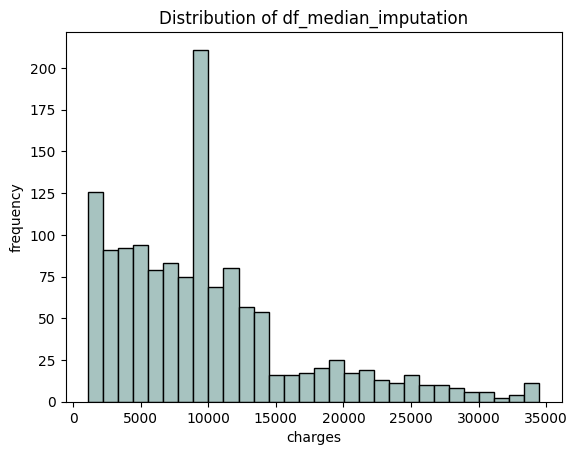

In [37]:
# Plotting a histogram of 'charges' from the df_median_imputation
plt.hist(df_median_imputation['charges'], bins=30, color='#A7C3C0', edgecolor='black') 

plt.title('Distribution of df_median_imputation')
plt.xlabel('charges')
plt.ylabel('frequency')
plt.show()

As a result of replacing the outliers with the **median**, the frequency of the **charges** feature at the mean value increased significantly.

## 1.4. Encode the Ordinal Features with Ordinal Encoding (2 Pts)

In [38]:
# Create a copy of the original dataframe to perform encoding
df_encoded = df.copy()

# Encode the 'smoker' column: 'no' as 0, 'yes' as 1
df_encoded['smoker'] = df_encoded['smoker'].map({'no': 0, 'yes': 1})

# Encode the 'sex' column: 'male' as 0, 'female' as 1
df_encoded['sex'] = df_encoded['sex'].map({'male': 0, 'female': 1})

# Encode the 'region' column: 'southwest' as 0, 'southeast' as 1, 'northwest' as 2, 'northeast' as 3
df_encoded['region'] = df_encoded['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

# Display the encoded dataframe
df_encoded

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


## 1.5. Manually shuffle the dataset and split it into training (70%) and testing (30%) sets. Write your own code for shuffling and splitting, avoiding the use of pre-defined functions like train_test_split. (8 Pts)

* ***You  cannot use scikit-learn's shuffle.***

In [39]:
# Keep all possible indices in a list.
indices = list(range(len(df)))

# Create an empty dataframe to create the shuffled df.
shuffled_df = pd.DataFrame(columns=df.columns)

#Select a random index from the indices list and assign it to the shuffled_df sequentially.
#Then, remove that index from the indices list so it is no longer available.
for i in range(len(df)):
    rand_index = random.randint(0, len(indices) - 1)
    shuffled_df.loc[len(shuffled_df)] = df.iloc[indices[rand_index]].values

    indices.pop(rand_index)

shuffled_df

,age,sex,bmi,children,smoker,region,charges
0,37,female,25.555,1,yes,northeast,20296.86345
1,54,female,32.68,0,no,northeast,10923.9332
2,18,male,41.14,0,no,southeast,1146.7966
3,50,female,27.6,1,yes,southwest,24520.264
4,59,male,29.83,3,yes,northeast,30184.9367
...,...,...,...,...,...,...,...
1333,41,male,21.78,1,no,southeast,6272.4772
1334,50,female,26.22,2,no,northwest,10493.9458
1335,19,female,32.49,0,yes,northwest,36898.73308
1336,36,male,31.5,0,no,southwest,4402.233


In [40]:
#Take the first %70 of the shuffled DataFrame to create train_df and the remaining %30 to create test_df.
indices = list(shuffled_df.index)

train_size = int(0.7 * len(shuffled_df))

train_df = shuffled_df.iloc[indices[:train_size]]
test_df = shuffled_df.iloc[indices[train_size:]]

In [41]:
train_df

,age,sex,bmi,children,smoker,region,charges
0,37,female,25.555,1,yes,northeast,20296.86345
1,54,female,32.68,0,no,northeast,10923.9332
2,18,male,41.14,0,no,southeast,1146.7966
3,50,female,27.6,1,yes,southwest,24520.264
4,59,male,29.83,3,yes,northeast,30184.9367
...,...,...,...,...,...,...,...
931,27,male,33.66,0,no,southeast,2498.4144
932,28,male,24.3,5,no,southwest,5615.369
933,63,male,35.09,0,yes,southeast,47055.5321
934,61,female,36.385,1,yes,northeast,48517.56315


In [42]:
test_df

,age,sex,bmi,children,smoker,region,charges
936,63,female,36.85,0,no,southeast,13887.9685
937,44,female,38.06,0,yes,southeast,48885.13561
938,44,male,30.2,2,yes,southwest,38998.546
939,37,male,22.705,3,no,northeast,6985.50695
940,42,male,37.18,2,no,southeast,7162.0122
...,...,...,...,...,...,...,...
1333,41,male,21.78,1,no,southeast,6272.4772
1334,50,female,26.22,2,no,northwest,10493.9458
1335,19,female,32.49,0,yes,northwest,36898.73308
1336,36,male,31.5,0,no,southwest,4402.233


# **PART- 2: REGRESSION (50 Pts)**
* Target value: charges
* Predictors: The rest

* ***You can use scikit-learn***




## 2.1. kNN Regression (20 Pts)
* For each version of the dataset (original, outlier-removed, mean-imputed, median-imputed), execute the following steps:
    * Split the data into train and test sets
    * Create an instance of kNN with a number of neighbors between 1-30, then fit kNN regression model to train data.
    * Predict the test set and calculate the MSE value for each k.
    * Plot the MSE vs k curve to decide on the optimal k.
    * Report the R-squared value for the optimal k.
* Compare the MSE values for each dataset and comment on the results. Which dataset gives the best result? Why do you think that is?


### kNN Regression for original_df

In [43]:
# Encode categorical variables using one-hot encoding.
encoded_original_df = pd.get_dummies(
    original_df,       
    columns=['sex', 'region', 'smoker'],  
    drop_first=True    
)

# Separate the features (X) by dropping the 'charges' column from the encoded dataframe
X = encoded_original_df.drop('charges', axis=1)

# Set the target variable (y) to the 'charges' column
y = encoded_original_df[['charges']]

# Scale the features (X) using StandardScaler to normalize the data
X_scaled = StandardScaler().fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 10)

In [45]:
#Train a model for all values from 1 to 30 by selecting a k value,
#calculate the MSE for each, and append it to the mse_values list.
mse_values = []

for k in range(1, 31):
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

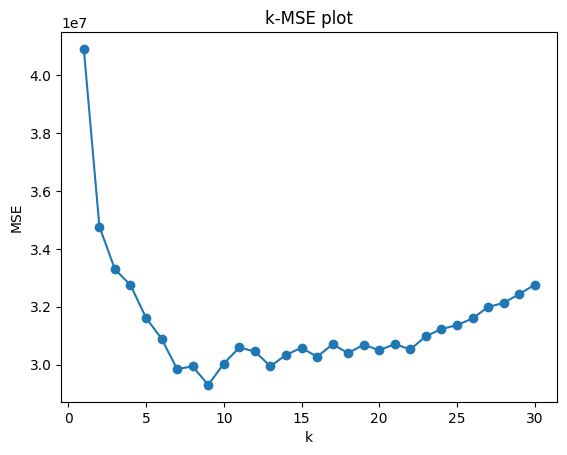

In [46]:
plt.plot(np.arange(1, 31), mse_values, marker='o')

plt.title('k-MSE plot')
plt.xlabel('k')
plt.ylabel('MSE')

plt.show()

When the graph is examined, it is observed that the lowest MSE value occurs when k = 9, so the optimal k is **9**.

In [47]:
knn_model = KNeighborsRegressor(n_neighbors=9)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

29295630.783056635


In [48]:
r2_score = knn_model.score(X_test, y_test) 
print("r2_score:", r2_score)

r2_score: 0.7744023670578113


### kNN Regression for df_without_outliers

In [49]:
# Encode categorical variables using one-hot encoding.
encoded_without_outliers_df = pd.get_dummies(
    df_without_outliers,        
    columns=['sex', 'region', 'smoker'], 
    drop_first=True    
)

# Separate the features (X) by dropping the 'charges' column from the encoded dataframe
X = encoded_without_outliers_df.drop('charges', axis=1)

# Set the target variable (y) to the 'charges' column
y = encoded_without_outliers_df[['charges']]

# Convert the scaled features back into a DataFrame with the same column names
X_scaled = StandardScaler().fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 10)

In [51]:
#Train a model for all values from 1 to 30 by selecting a k value,
#calculate the MSE for each, and append it to the mse_values list.
mse_values = []

for k in range(1, 31):
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

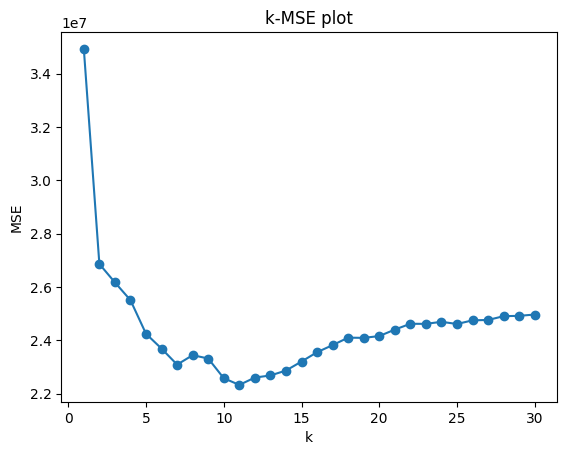

In [52]:
plt.plot(np.arange(1, 31), mse_values, marker='o')

plt.title('k-MSE plot')
plt.xlabel('k')
plt.ylabel('MSE')

plt.show()

When the graph is examined, it is observed that the lowest MSE value occurs when k = 11, so the optimal k is 11.

In [53]:
knn_model = KNeighborsRegressor(n_neighbors=11)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

22326068.0694162


In [54]:
r2_score = knn_model.score(X_test, y_test) 
print("r2_score:", r2_score)

r2_score: 0.6000962494943949


### kNN Regression for df_mean_imputation

In [55]:
# Encode categorical variables using one-hot encoding.
encoded_mean_imputation_df = pd.get_dummies(
    df_mean_imputation,        
    columns=['sex', 'region', 'smoker'], 
    drop_first=True    
)

# Separate the features (X) by dropping the 'charges' column from the encoded dataframe
X = encoded_mean_imputation_df.drop('charges', axis=1)

# Set the target variable (y) to the 'charges' column
y = encoded_mean_imputation_df[['charges']]

# Convert the scaled features back into a DataFrame with the same column names
X_scaled = StandardScaler().fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 10)

In [57]:
#Train a model for all values from 1 to 30 by selecting a k value,
#calculate the MSE for each, and append it to the mse_values list.
mse_values = []

for k in range(1, 31):
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

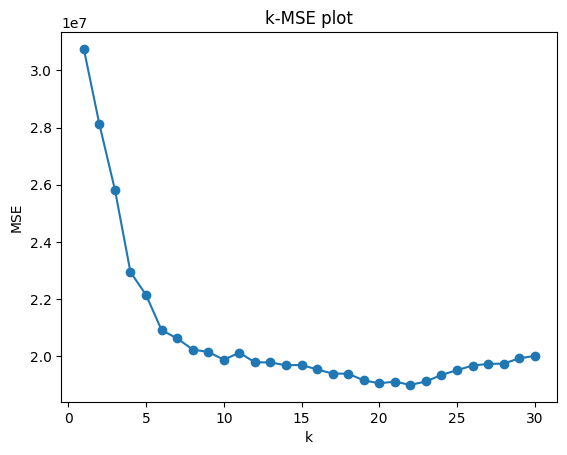

In [58]:
plt.plot(np.arange(1, 31), mse_values, marker='o')

plt.title('k-MSE plot')
plt.xlabel('k')
plt.ylabel('MSE')

plt.show()

When the graph is examined, it is observed that the lowest MSE value occurs when k = 22, so the optimal k is 22.

In [59]:
knn_model = KNeighborsRegressor(n_neighbors=22)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

18991962.19289246


In [60]:
r2_score = knn_model.score(X_test, y_test) 
print("r2_score:", r2_score)

r2_score: 0.5579498078052838


### kNN Regression for df_median_imputation

In [61]:
# Encode categorical variables using one-hot encoding.
encoded_median_imputation_df = pd.get_dummies(
    df_median_imputation,        
    columns=['sex', 'region', 'smoker'], 
    drop_first=True    
)

# Separate the features (X) by dropping the 'charges' column from the encoded dataframe
X = encoded_median_imputation_df.drop('charges', axis=1)

# Set the target variable (y) to the 'charges' column
y = encoded_median_imputation_df[['charges']]

# Convert the scaled features back into a DataFrame with the same column names
X_scaled = StandardScaler().fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 10)

In [63]:
#Train a model for all values from 1 to 30 by selecting a k value,
#calculate the MSE for each, and append it to the mse_values list.
mse_values = []

for k in range(1, 31):
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

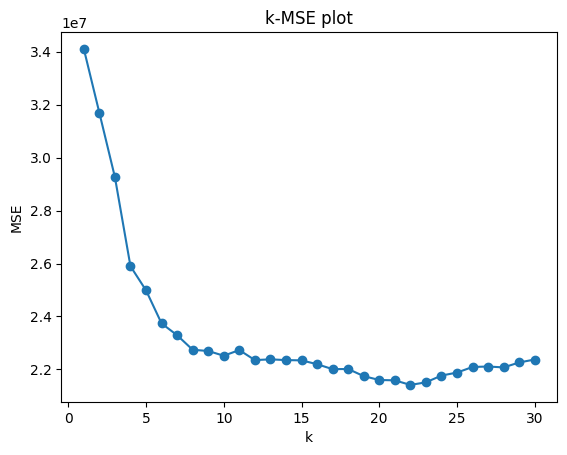

In [64]:
plt.plot(np.arange(1, 31), mse_values, marker='o')

plt.title('k-MSE plot')
plt.xlabel('k')
plt.ylabel('MSE')

plt.show()

When the graph is examined, it is observed that the lowest MSE value occurs when k = 22, so the optimal k is 22.

In [65]:
knn_model = KNeighborsRegressor(n_neighbors=22)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

21417301.0341395


In [66]:
r2_score = knn_model.score(X_test, y_test) 
print("r2_score:", r2_score)

r2_score: 0.4907076539878563


The best MSE value occurs for **df_mean_imputation**. This suggests that mean imputation has resulted in the best performance in terms of prediction accuracy. The next lowest MSE value is found for **df_median_imputation**. Median imputation also improves the model, but not as effectively as mean imputation. After that, **df_without_outliers** follows, and lastly, **original_df** comes last.

Removing outliers seems to have helped the model improve, though it does not perform as well as the mean imputation method. The **original_df** (without any preprocessing) has the highest MSE, which shows that outliers are likely affecting the model's performance negatively. 

As a result, filling outliers with mean values helps reduce prediction errors. Filling outliers with median values and removing outliers from the original dataset also result in better performance than using the original data.

## 2.2. Linear Regression (20 Pts)
* For each version of the dataset (original, outlier removal, mean imputation, median imputation), do the following steps:
    * Split the data into train and test sets
    * Fit a linear regression model to train data.
    * Predict the test set and calculate the MSE value.

### Linear Regression for original_df

In [67]:
# Encode categorical variables using one-hot encoding.
encoded_original_df = pd.get_dummies(
    original_df,       
    columns=['sex', 'region', 'smoker'],  
    drop_first=True    
)

# Separate the features (X) by dropping the 'charges' column from the encoded dataframe
X = encoded_original_df.drop('charges', axis=1)

# Set the target variable (y) to the 'charges' column
y = encoded_original_df[['charges']]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 10)

In [69]:
reg_model = LinearRegression().fit(X_train, y_train)

y_pred = reg_model.predict(X_test)
mean_squared_error(y_test, y_pred)

np.float64(36800107.88801558)

### Linear Regression for df_without_outliers

In [70]:
# Encode categorical variables using one-hot encoding.
encoded_without_outliers_df = pd.get_dummies(
    df_without_outliers,        
    columns=['sex', 'region', 'smoker'], 
    drop_first=True    
)

# Separate the features (X) by dropping the 'charges' column from the encoded dataframe
X = encoded_without_outliers_df.drop('charges', axis=1)

# Set the target variable (y) to the 'charges' column
y = encoded_without_outliers_df[['charges']]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 10)

In [72]:
reg_model = LinearRegression().fit(X_train, y_train)

y_pred = reg_model.predict(X_test)
mean_squared_error(y_test, y_pred)

np.float64(20834270.37603294)

### Linear Regression for df_mean_imputation

In [73]:
# Encode categorical variables using one-hot encoding.
encoded_mean_imputation_df = pd.get_dummies(
    df_mean_imputation,        
    columns=['sex', 'region', 'smoker'], 
    drop_first=True    
)

# Separate the features (X) by dropping the 'charges' column from the encoded dataframe
X = encoded_mean_imputation_df.drop('charges', axis=1)

# Set the target variable (y) to the 'charges' column
y = encoded_mean_imputation_df[['charges']]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 10)

In [75]:
reg_model = LinearRegression().fit(X_train, y_train)

y_pred = reg_model.predict(X_test)
mean_squared_error(y_test, y_pred)

np.float64(18762637.970722195)

### Linear Regression for df_median_imputation

In [76]:
# Encode categorical variables using one-hot encoding.
encoded_median_imputation_df = pd.get_dummies(
    df_median_imputation,        
    columns=['sex', 'region', 'smoker'], 
    drop_first=True    
)

# Separate the features (X) by dropping the 'charges' column from the encoded dataframe
X = encoded_median_imputation_df.drop('charges', axis=1)

# Set the target variable (y) to the 'charges' column
y = encoded_median_imputation_df[['charges']]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)

In [78]:
reg_model = LinearRegression().fit(X_train, y_train)

y_pred = reg_model.predict(X_test)
mean_squared_error(y_test, y_pred)

np.float64(26930930.921433512)

## 2.3. Compare the Regression Methods (10 Pts)

* Compare and contrast the performance of kNN and Linear Regression models across the different dataset versions (those attained in 1.3.).

* Discuss the strengths and limitations of each model based on your results

### Performance of kNN and Linear Regression models across the different dataset versions
* For the **original_df**, the kNN model has a lower MSE compared to Linear Regression. This suggests that the kNN model is more resilient to data with **outliers**. 

* For **df_without_outliers**, Linear Regression performs better. With no outliers present, the dataset is cleaner, and the **linear relationships** become more pronounced. Linear Regression was the correct choice here, as this model, which can model linear relationships, performs better.

* For **df_mean_imputation**, both models have similar MSE values. The missing values were filled with the **mean**, leading to similar results for both models. This indicates that both models are equally resilient to such datasets.

* For **df_median_imputation**, kNN has a slightly lower MSE. Median imputation results in data less affected by outliers, and therefore the kNN model performs better with this type of data.

### Advantages and Disadvantages of kNN:
* Since **kNN** evaluates the similarity between data points, it is more robust to outliers and missing values in the dataset. It can also be used for **non-linear** and more complex data, but it may work slowly with large datasets. The correct selection of **k** and other parameters is crucial, as the model's performance is highly dependent on these parameters.

### Advantages and Disadvantages of Linear Regression:
* In **cleaned datasets**, where linear relationships are more pronounced, **Linear Regression** performs better. It is much faster and is suitable for datasets that contain **linear relationships**. The model is simple and interpretable, based on learning the weights and the bias term. However, its performance decreases with **non-linear relationships**. It is also highly sensitive to **outliers**, which can degrade the model’s performance.